Итак импортируем нужные библтотеки

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

Импортируем датасет

In [5]:
data = pd.read_csv('..\data\diamonds.csv')

# Предворительная обработка датасета

Теперь посмотрим на то как выглядит наш датасет

In [6]:
data.head (20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [7]:
del data['Unnamed: 0']

Этот столбик нам не нужен

Просмотрим общую информацию о датасете

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Сразу можем отметить, что пропущенных значений нет, так как все столбики полностью заполнены

Выведем заголовки таблицы

In [9]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Наименование менять не нужно все и так по правилам хорошего тона

Проверим на наличие дубликатов

In [10]:
data.duplicated().sum()

146

Итак, мы видим, что есть дубликаты

Удалим их

In [11]:
data = data.drop_duplicates().reset_index(drop=True)

Проверим

In [12]:
data.duplicated().sum()

0

Посмотрим на неявные дубликаты

In [13]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [14]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [15]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Неявных дубликатов нет, предворительная обработка окончена, теперь можем переходить к разведочному анализу данных(EDA)

# Разведочный анализ данных(EDA)

Будем исследовать слудующие параметры
- carat
- depth
- table
- price
- x
- y
- z

Посмотрим описание этих столбиков

In [16]:
data.describe()[['carat','depth','table','price','x', 'y', 'z']]

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Построим гистограммы

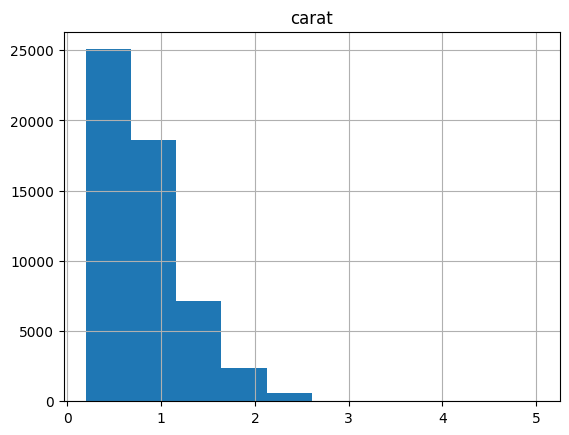

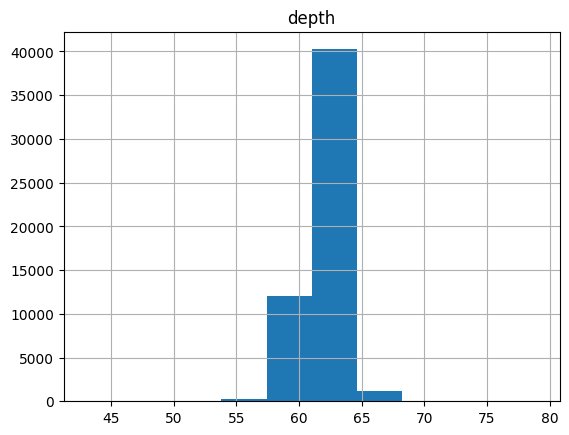

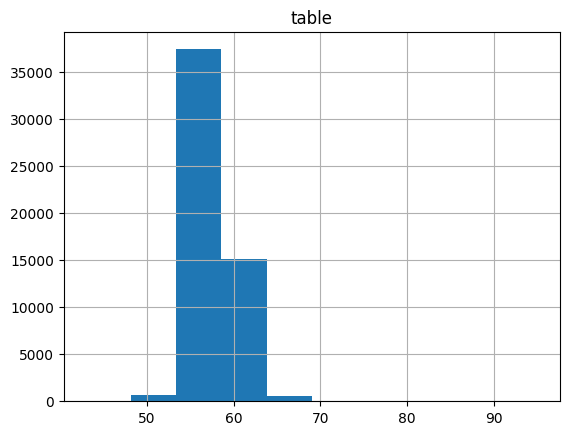

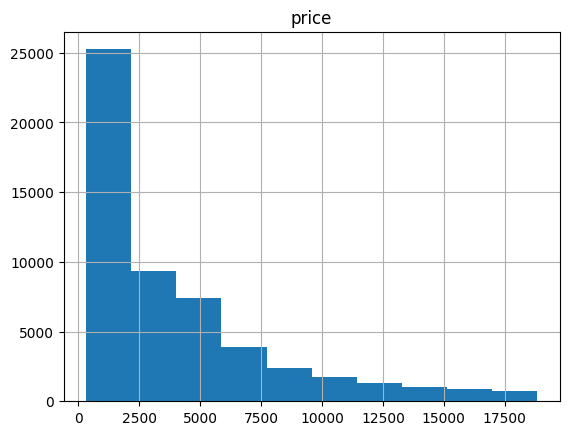

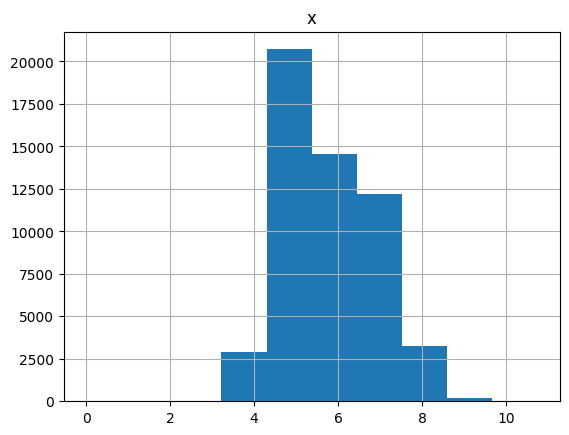

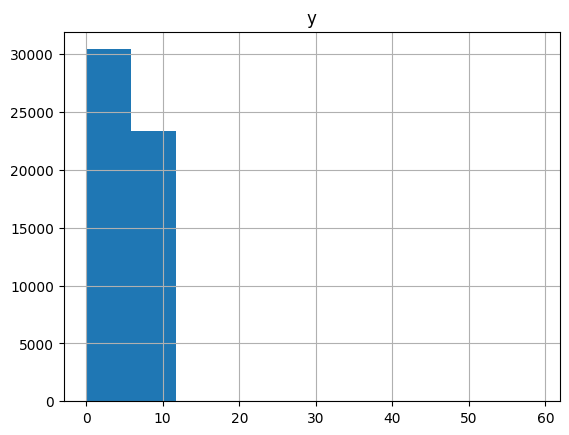

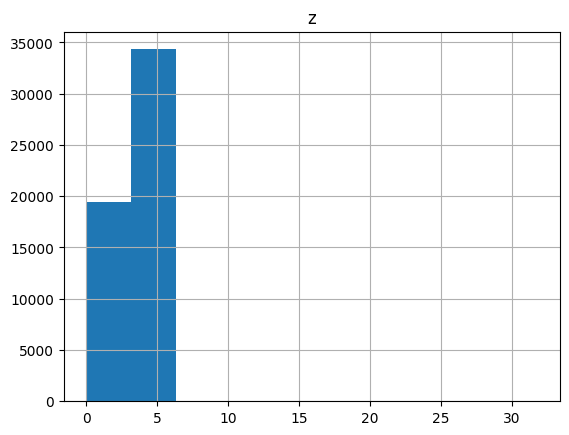

In [17]:
columns = ['carat','depth','table','price','x', 'y', 'z']

for column in columns:
    data.hist(column)

Выбросы имеются во всех столбиках 

In [18]:
# Создаём Dataframe на основе столбцов с выбросами
outlier = data[['carat','depth','table','price','x', 'y', 'z']]
outlier

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53789,0.72,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [19]:
# Определяем нижние пределы для выбросов
Q1 = outlier.quantile(0.25)
Q1

carat      0.40
depth     61.00
table     56.00
price    951.00
x          4.71
y          4.72
z          2.91
Name: 0.25, dtype: float64

In [20]:
# Определяем верхние пределы выбросов
Q3 = outlier.quantile(0.75)
Q3

carat       1.04
depth      62.50
table      59.00
price    5326.75
x           6.54
y           6.54
z           4.03
Name: 0.75, dtype: float64

In [21]:
# IQR-оценка
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53789,0.72,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [22]:
# Копирование индексов
index_list = list(data_filtered.index.values)

In [23]:
# Сохранение данных без выбросов в отдельном DataFrame.
data_filtered = data[data.index.isin(index_list)]
data_filtered.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


Создаём гистограммы без выбросов

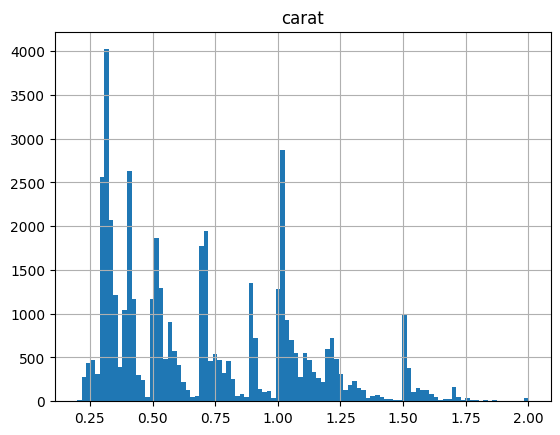

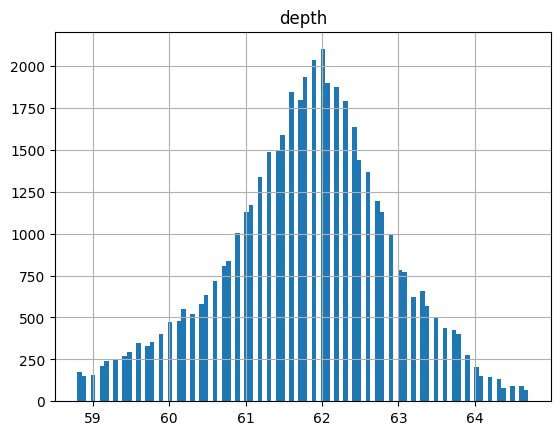

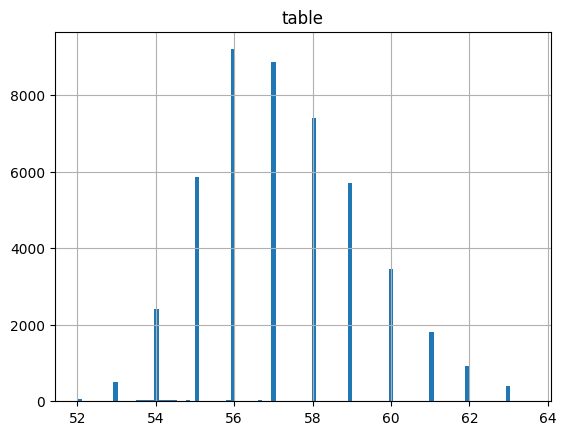

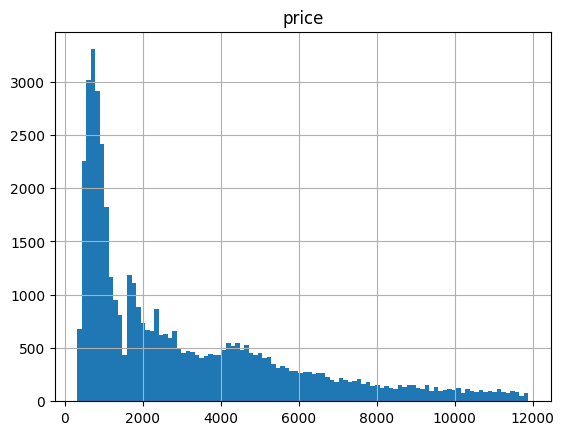

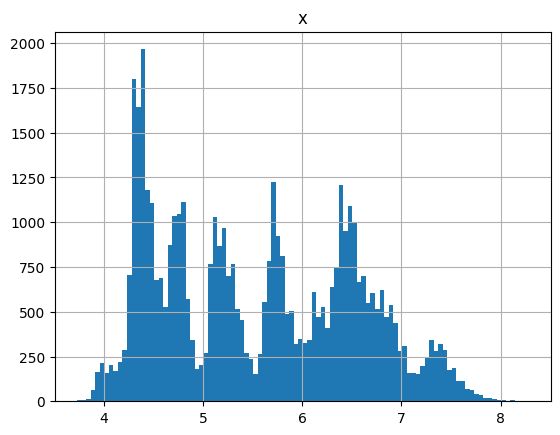

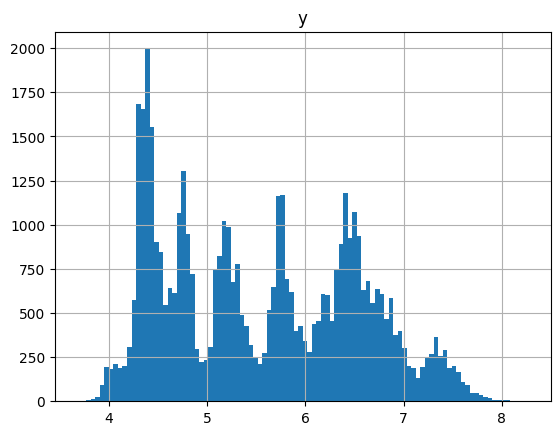

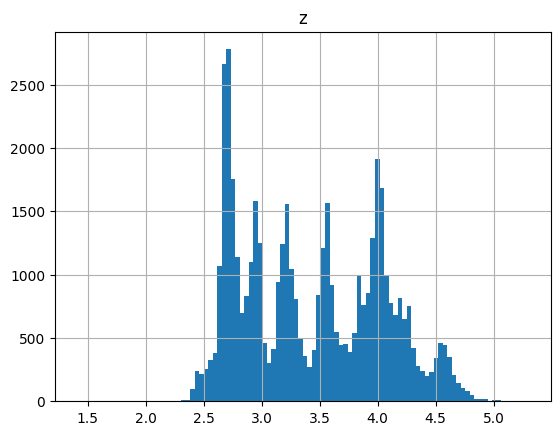

In [24]:
filtered_outlier = data_filtered[['carat','depth','table','price','x', 'y', 'z']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

Давайте посмотрим среднюю цену за каждый тип огранки алмаза

In [25]:
cut_price = data_filtered.pivot_table(index='cut', values='price', aggfunc='mean')
cut_price = cut_price.sort_values(ascending=False ,by='price')
cut_price

,price
cut,
Fair,3701.981818
Premium,3485.008525
Very Good,3222.782684
Good,3215.508425
Ideal,2801.711651


Или на то как влияет огранка на глубину алмаза

In [26]:
cut_depth = data_filtered.pivot_table(index='cut', values='depth', aggfunc='mean')
cut_depth = cut_depth.sort_values(ascending=False ,by='depth')
cut_depth

,depth
cut,
Fair,63.916970
Good,63.068334
Very Good,61.910178
Ideal,61.706775
Premium,61.350687


Также взглянем на колличество карат

In [27]:
cut_carat = data_filtered.pivot_table(index='cut', values='carat', aggfunc='mean')
cut_carat = cut_carat.sort_values(ascending=False ,by='carat')
cut_carat

,carat
cut,
Fair,0.922091
Premium,0.778417
Good,0.768058
Very Good,0.731905
Ideal,0.640768


In [28]:
cut_price = cut_price.reset_index()
cut_depth = cut_depth.reset_index()
cut_carat = cut_carat.reset_index()

<Axes: xlabel='cut'>

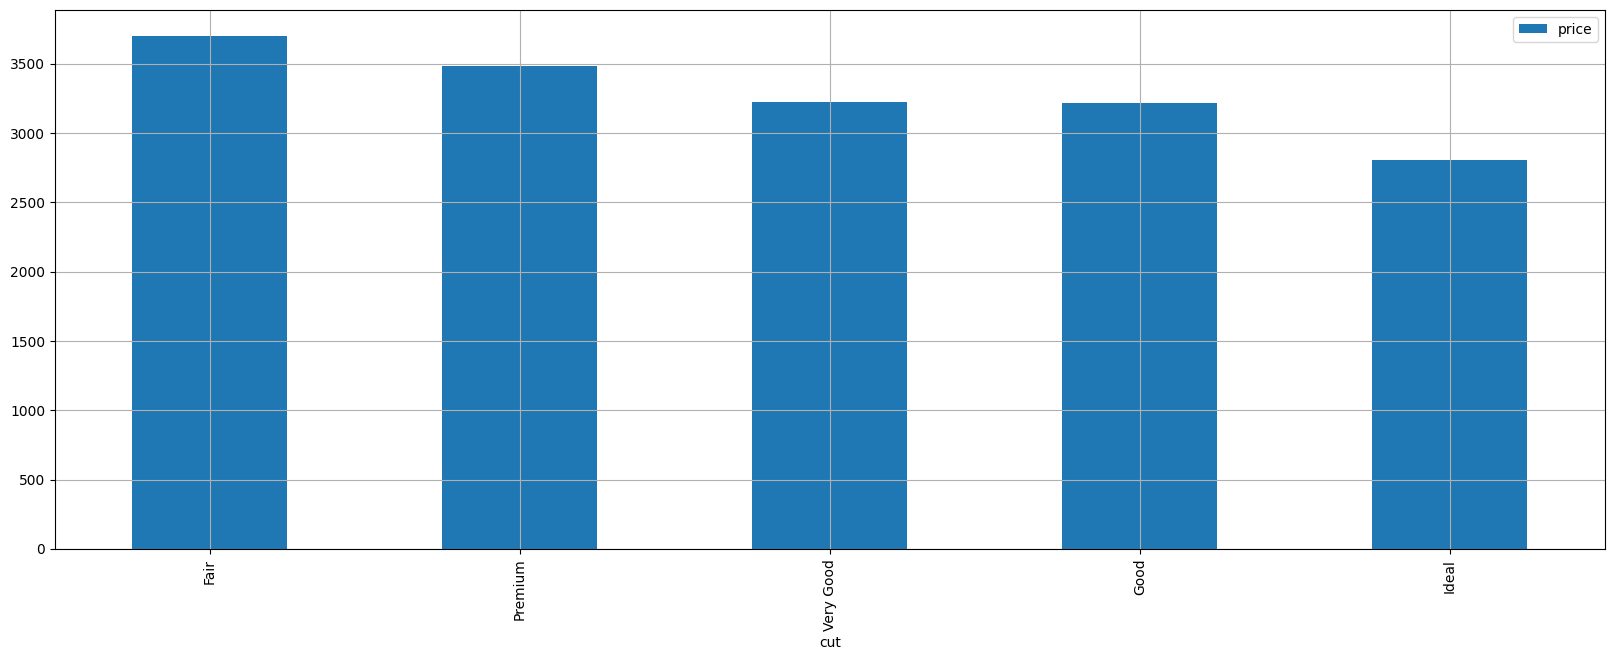

In [29]:
cut_price.plot(grid=True, figsize=(20, 7), kind = 'bar', x='cut',y='price')

<Axes: xlabel='cut'>

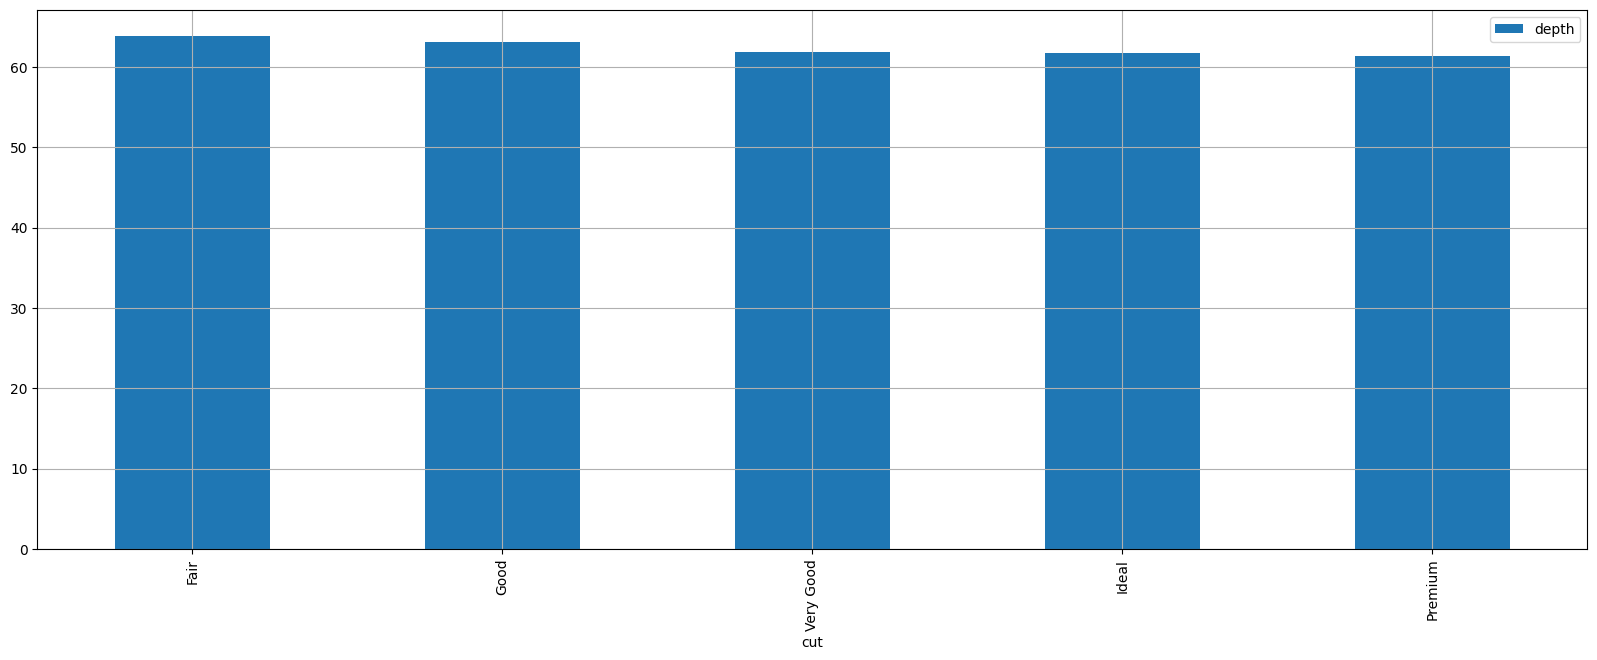

In [30]:
cut_depth.plot(grid=True, figsize=(20, 7), kind = 'bar', x='cut',y='depth')

<Axes: xlabel='cut'>

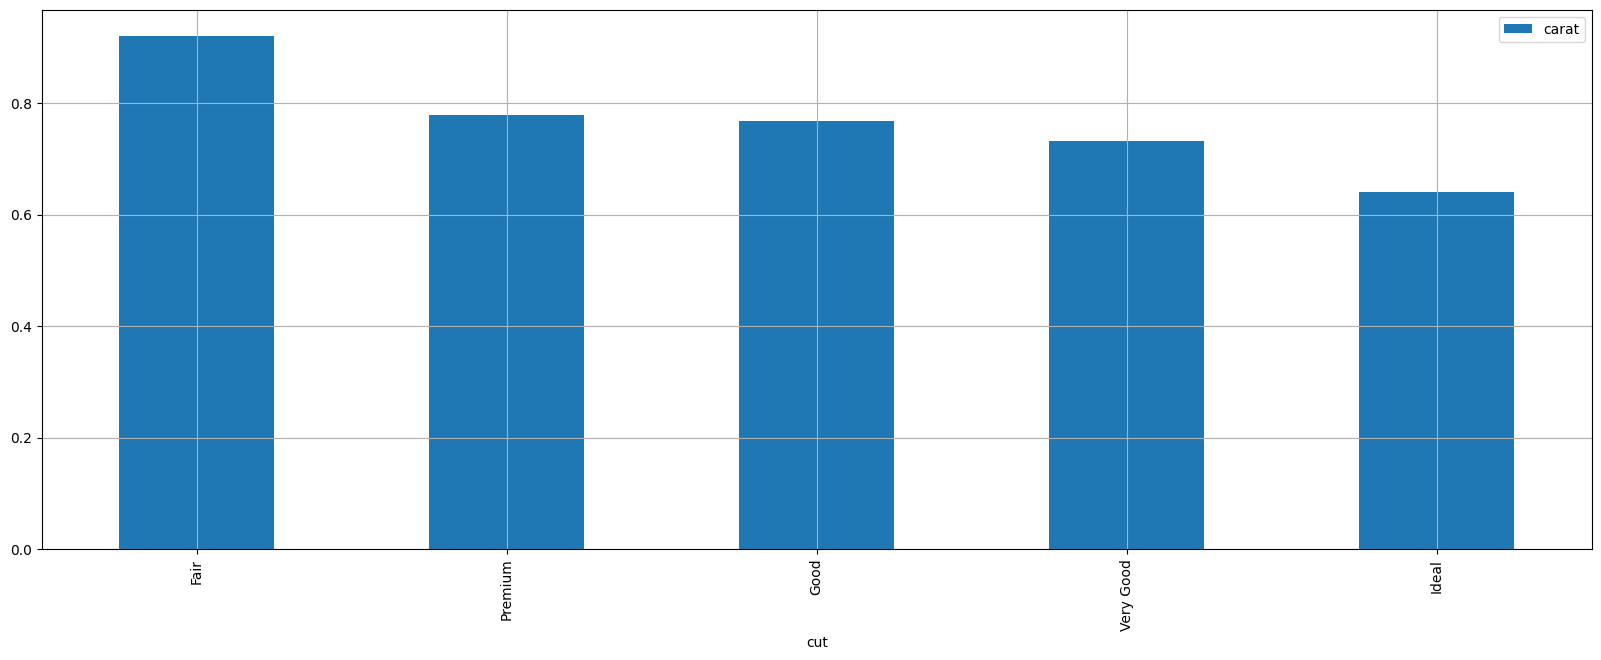

In [31]:
cut_carat.plot(grid=True, figsize=(20, 7), kind = 'bar', x='cut',y='carat')

Итак мы видем что Fair то есть справедлиная огранка имеет больше всего карат, глубину и цену

Итак, посмотрим от чего может зависеть цена
- carat
- cut
- color
- clarity
- depth
- table
- x
- y
- z'

In [32]:
fair = data_filtered.query('cut == "Fair"')
premium = data_filtered.query('cut == "Premium"')

Text(0.5, 1.0, 'premium')

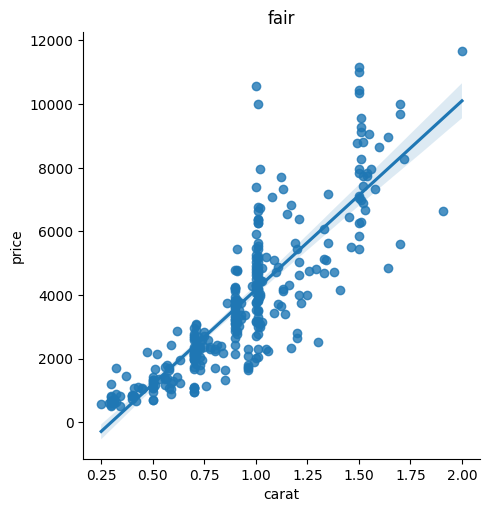

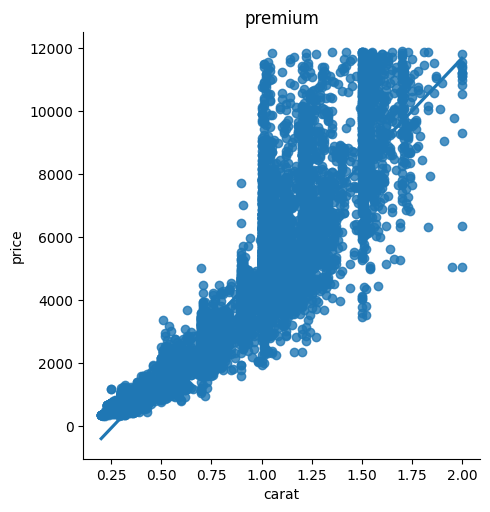

In [33]:
sns.lmplot(x="carat", y="price", data=fair)
plt.title('fair')
sns.lmplot(x="carat", y="price", data=premium)
plt.title('premium')

In [34]:
carat_fair = fair[['carat','price']]
corr_fair = carat_fair.corr()
carat_premium = premium[['carat','price']]
corr_premium = carat_premium.corr()

In [35]:
round(corr_fair,3)

,carat,price
carat,1.00,0.85
price,0.85,1.00


In [36]:
round(corr_premium,3)

,carat,price
carat,1.000,0.921
price,0.921,1.000


Итак мы можем видеть что взаимосвязь цены и карат очень крепкая 

Text(0.5, 1.0, 'premium')

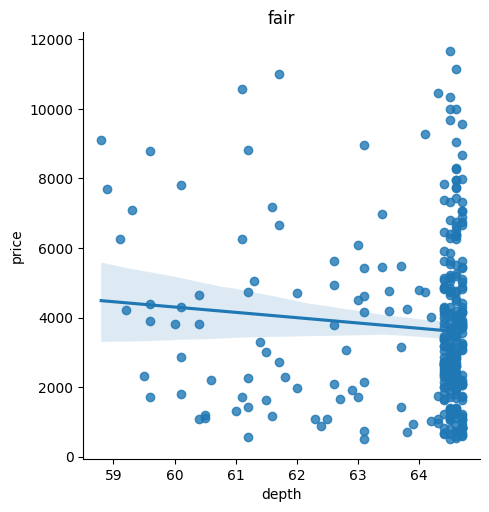

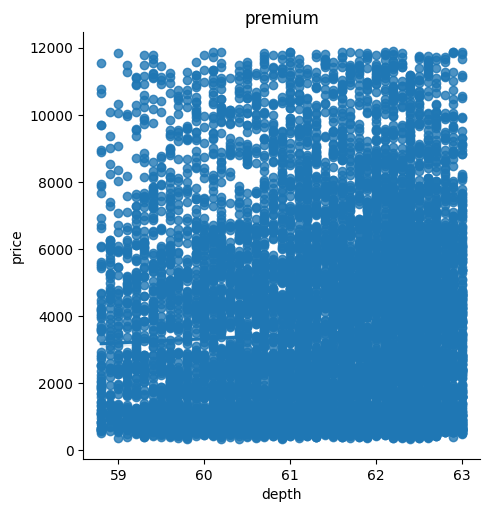

In [37]:
sns.lmplot(x="depth", y="price", data=fair)
plt.title('fair')
sns.lmplot(x="depth", y="price", data=premium)
plt.title('premium')

In [38]:
depth_fair = fair[['depth','price']]
corr_fair_depth = depth_fair.corr()
depth_premium = premium[['depth','price']]
corr_premium_depth = depth_premium.corr()

In [39]:
round(corr_fair_depth,3)

,depth,price
depth,1.000,-0.089
price,-0.089,1.000


In [40]:
round(corr_premium_depth,3)

,depth,price
depth,1.000,0.045
price,0.045,1.000


Зависимость цены от глубины не так хороша так как значение еореляции близится к нулю

Text(0.5, 1.0, 'premium')

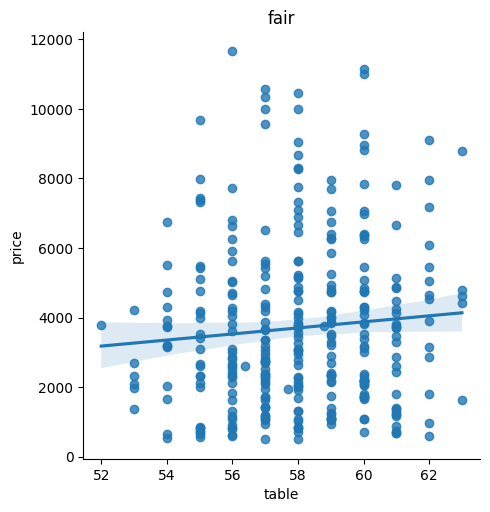

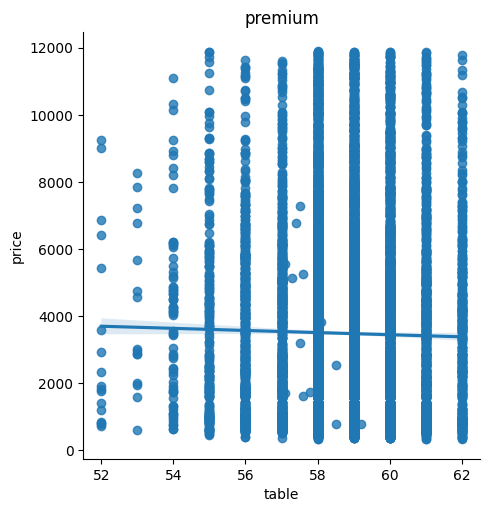

In [41]:
sns.lmplot(x="table", y="price", data=fair)
plt.title('fair')
sns.lmplot(x="table", y="price", data=premium)
plt.title('premium')

In [42]:
table_fair = fair[['table','price']]
corr_fair_table = table_fair.corr()
table_premium = premium[['table','price']]
corr_premium_table = table_premium.corr()

In [43]:
round(corr_fair_table,3)

,table,price
table,1.000,0.084
price,0.084,1.000


In [44]:
round(corr_premium_table,3)

,table,price
table,1.000,-0.016
price,-0.016,1.000


Зависимость цены от верхней грани алмаза не так хороша так как значение еореляции близится к нулю

Text(0.5, 1.0, 'premium')

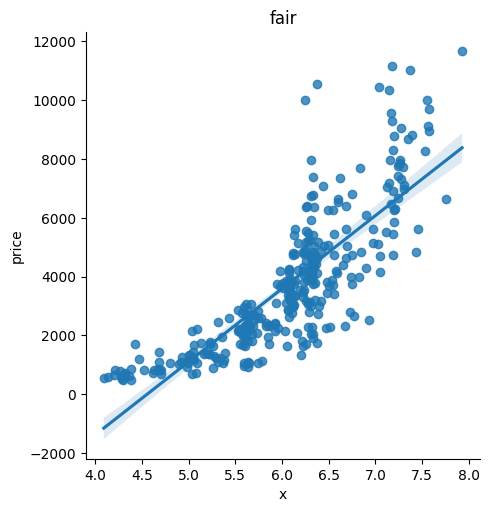

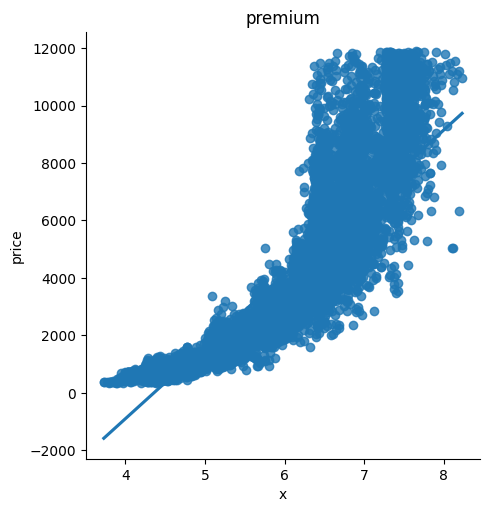

In [45]:
sns.lmplot(x="x", y="price", data=fair)
plt.title('fair')
sns.lmplot(x="x", y="price", data=premium)
plt.title('premium')

In [46]:
x_fair = fair[['x','price']]
corr_fair_x = x_fair.corr()
x_premium = premium[['x','price']]
corr_premium_x = x_premium.corr()

In [47]:
round(corr_fair_x,3)

,x,price
x,1.000,0.822
price,0.822,1.000


In [48]:
round(corr_premium_x,3)

,x,price
x,1.000,0.897
price,0.897,1.000


От длины цена довольно сильно зависима

Text(0.5, 1.0, 'premium')

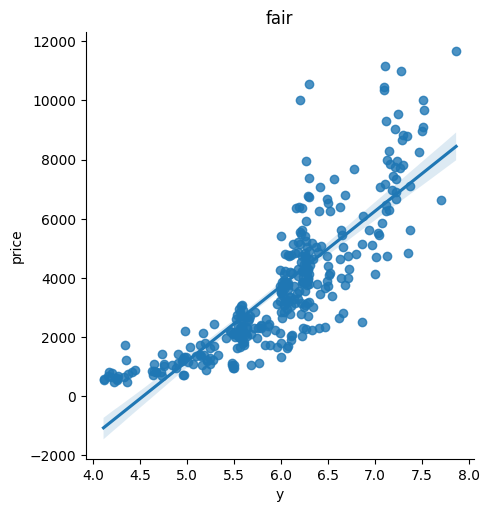

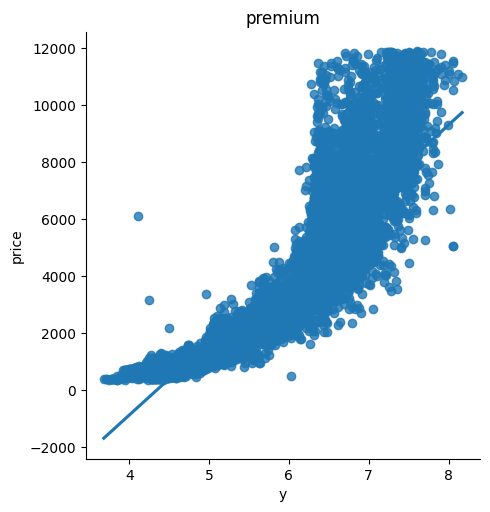

In [49]:
sns.lmplot(x="y", y="price", data=fair)
plt.title('fair')
sns.lmplot(x="y", y="price", data=premium)
plt.title('premium')

In [50]:
y_fair = fair[['y','price']]
corr_fair_y = y_fair.corr()
y_premium = premium[['y','price']]
corr_premium_y = y_premium.corr()

In [51]:
round(corr_fair_y,3)

,y,price
y,1.000,0.834
price,0.834,1.000


In [52]:
round(corr_premium_y,3)

,y,price
y,1.000,0.898
price,0.898,1.000


И от длины цена тоже очень зависима

Text(0.5, 1.0, 'premium')

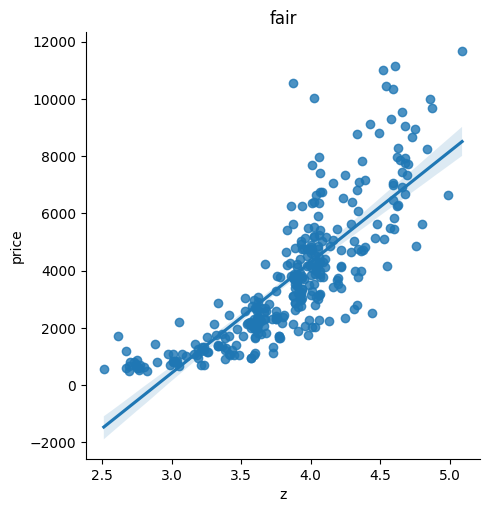

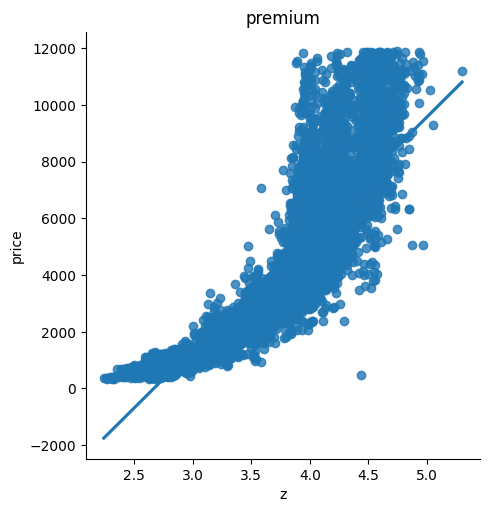

In [53]:
sns.lmplot(x="z", y="price", data=fair)
plt.title('fair')
sns.lmplot(x="z", y="price", data=premium)
plt.title('premium')

In [54]:
z_fair = fair[['z','price']]
corr_fair_z = z_fair.corr()
z_premium = premium[['z','price']]
corr_premium_z = z_premium.corr()

In [55]:
round(corr_fair_z,3)

,z,price
z,1.000,0.812
price,0.812,1.000


In [56]:
round(corr_premium_z,3)

,z,price
z,1.000,0.898
price,0.898,1.000


И от глубины цена тоже очень зависит

<Axes: title={'center': 'price'}, xlabel='color'>

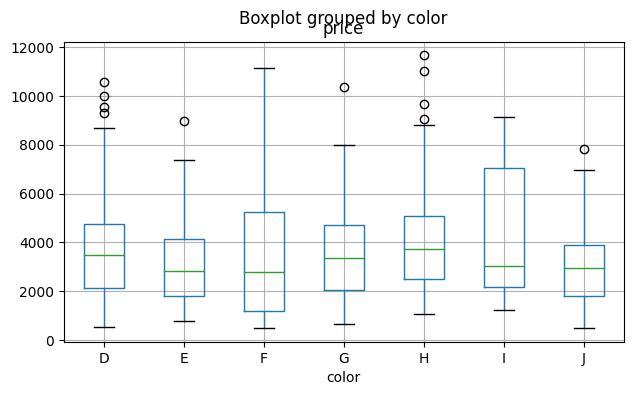

In [57]:
fair.boxplot(by ='color', column =['price'],figsize=(7,4), grid = True)

<Axes: title={'center': 'price'}, xlabel='color'>

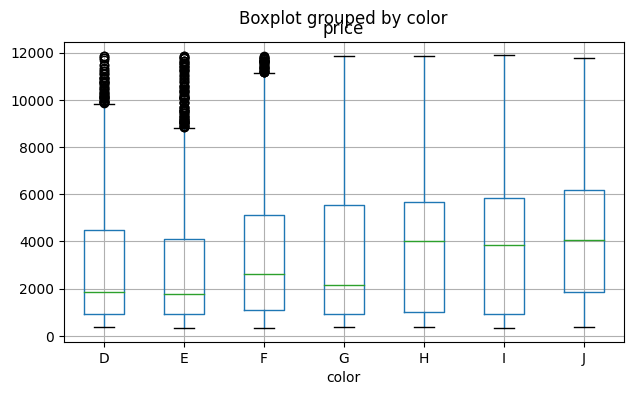

In [58]:
premium.boxplot(by ='color', column =['price'],figsize=(7,4), grid = True)

Исходя из графиков в среднем цена выше у более плохих цветов 

<Axes: title={'center': 'price'}, xlabel='clarity'>

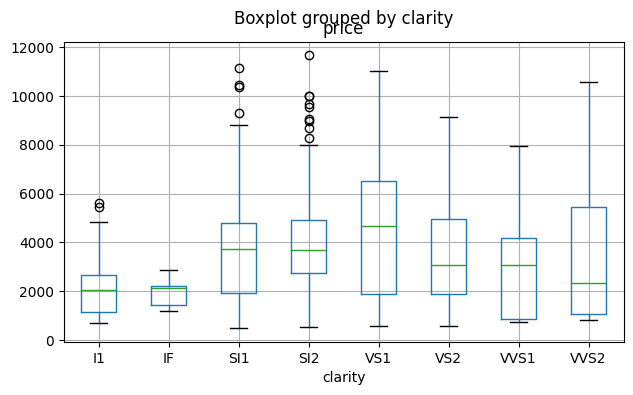

In [59]:
fair.boxplot(by ='clarity', column =['price'],figsize=(7,4), grid = True)

<Axes: title={'center': 'price'}, xlabel='clarity'>

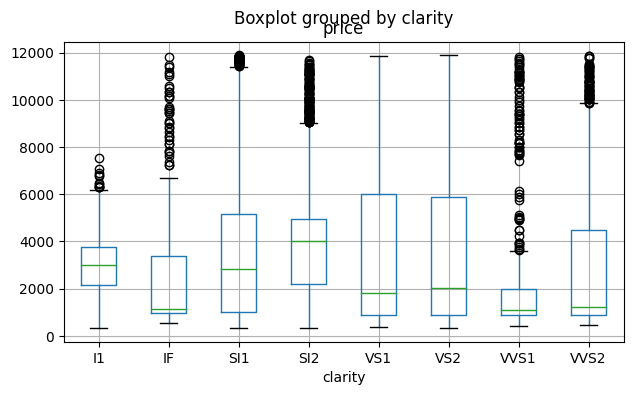

In [60]:
premium.boxplot(by ='clarity', column =['price'],figsize=(7,4), grid = True)

В среднем более дорогие алмазы средней прозрачности

In [61]:
dict_cut = {'Ideal': 5,
            'Premium': 4,
            'Very Good': 3,
            'Good': 2,
            'Fair': 1}

data['cut'] = data['cut'].map(dict_cut)

dict_color = {'D': 7,
              'E': 6,
              'F': 5,
              'G': 4,
              'H': 3,
              'I': 2,
              'J': 1}

data['color'] = data['color'].map(dict_color)

dict_clarity = {'IF': 8,
              'VVS1': 7,
              'VVS2': 6,
              'VS1': 5,
              'VS2': 4,
              'SI1': 3,
              'SI2': 2,
              'I1': 1}

data['clarity'] = data['clarity'].map(dict_clarity)

In [62]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.133376,-0.291019,-0.352288,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
cut,-0.133376,1.000000,0.020162,0.188327,-0.217078,-0.433700,-0.052241,-0.124303,-0.120233,-0.147940
color,-0.291019,0.020162,1.000000,-0.025542,-0.047572,-0.026102,-0.171825,-0.269876,-0.263153,-0.267825
clarity,-0.352288,0.188327,-0.025542,1.000000,-0.067292,-0.160000,-0.146149,-0.371636,-0.358048,-0.366568
depth,0.027861,-0.217078,-0.047572,-0.067292,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.433700,-0.026102,-0.160000,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.052241,-0.171825,-0.146149,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.124303,-0.269876,-0.371636,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.120233,-0.263153,-0.358048,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,-0.147940,-0.267825,-0.366568,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


Итак, подведём итоги.

На цену влияет только вес алмаза, длина, ширина и глубина

# Выделение целевого признака, предикторов и разбиение данных на обучающую и тестовую группы

Выделяем целевой признак

In [63]:
y = data["price"]
X = data.drop(["price"], axis=1)

In [64]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53789    2757
53790    2757
53791    2757
53792    2757
53793    2757
Name: price, Length: 53794, dtype: int64

In [65]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53789,0.72,5,7,3,60.8,57.0,5.75,5.76,3.50
53790,0.72,2,7,3,63.1,55.0,5.69,5.75,3.61
53791,0.70,3,7,3,62.8,60.0,5.66,5.68,3.56
53792,0.86,4,3,2,61.0,58.0,6.15,6.12,3.74


y это наш целевой признак, а X это наши предикторы(признаки по которым оценивается цена алмаза)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#test_size параметр который задаёт сколько процентов уйдёт на тесты

test_size параметр который задаёт сколько процентов уйдёт на тесты

In [67]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((43035, 9), (43035,), (10759, 9), (10759,))

# Решим задачу регрессии(простая линейная регрессия, множественная линейная регрессия)

In [68]:
# Названия импортируемых моделей которые будут использоваться
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [69]:
# определяем модель LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [70]:
# Определение переменных x и переменной Y.
# Учитывая значение корреляции с ценой лучше всех взяимодействует вес 
x = X_train[['carat']]
Y = y_train

lm.fit(x,Y)

LinearRegression()

Получение предсказания

In [71]:
lm.predict(X_test[['carat']])

array([  68.32332115, 5497.32872351, 8987.40362503, ...,  223.43776122,
       9452.74694523,   68.32332115])

## Вычислим знаечния метрик R2,MAE,MSE,RMSE,MAPE

Портируем нужные функции из библиотек

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

запишем предсказания в перееменную

In [73]:
y_pred = lm.predict(X_test[['carat']])
X_test_carat = X_test[['carat']]

In [74]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lm.score(X_test_carat, y_test)}')

MAE: 1003.8576668474317
MSE: 2361872.535829053
RMSE: 1536.8384872292381
MAPE: 0.6195431110387793
R^2: 0.85307377779433


In [75]:
#посмотрим какие получились коэффициенты в модели
len(lm.coef_)
lm.coef_

array([7755.72200337])

Модель справилась очень хорошо, так как значения метрик хорошие

Теперь обучим модель используя Ridge

In [76]:
# L2
ridge = Ridge(alpha=0.5).fit(X_train[['carat']], y_train)
y_pred = ridge.predict(X_test_carat)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test_carat, y_test)}')
ridge.coef_

MAE: 1003.8192099715776
MSE: 2361879.733967518
RMSE: 1536.840829093084
MAPE: 0.6194906997958142
R^2: 0.8530733300160204


array([7755.31920056])

Эта модель получилась очень похожей на прошлую, значения получились лучше, но не на моного

Теперь обучим модель используя Lasso

In [77]:
# L1
lasso = Lasso(alpha=0.5).fit(X_train[['carat']], y_train)
y_pred = lasso.predict(X_test_carat)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test_carat, y_test)}')
lasso.coef_

MAE: 1003.6442660047402
MSE: 2361913.40335828
RMSE: 1536.851783145753
MAPE: 0.619252220104254
R^2: 0.8530712355268751


array([7753.48681248])

Эта модель получилась очень похожей на две прошлые модели, значения получились лучше, но не на моного

Для моделей подберём лучший гиперпараметр

In [78]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [79]:
# для поиска гиперпараметров мы всегда сначала формируем словарь
# ключами словаря являются названия гиперпараметров
# значениями - список (или массив numpy) с возможными значениями
parameters = {'alpha': np.arange(0, 1, 0.1)}

Используем GridSearchCV. Он перебирает все возможные варианты

In [80]:
# а теперь пробуем подобрать значение этого гиперпараметра с помощью GridSearchCV
# оборачиваем нашу модель в объект GridSearchCV, туда же передаем словарь с параметрами и стартуем обучение
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train[['carat']], y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.9}

Используем RandomizedSearchCV. Он будет перебирать только случайные варианты

In [81]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train[['carat']], y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.9}

Обучим модель с гиперпараметрами 

In [82]:
y_pred = ridge_optimal.predict(X_test_carat)

In [83]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge_optimal.score(X_test_carat, y_test)}')

MAE: 1003.7884473468849
MSE: 2361885.5446637264
RMSE: 1536.8427195597233
MAPE: 0.6194487715286069
R^2: 0.8530729685470464


гиперпараметры ни на что не повлияли. Модель не изменилась

## Множественная линейная регрессия

In [84]:
# Определим модель множественной линейной регрессии
mlrm = LinearRegression().fit(X_train,y_train)
mlrm

LinearRegression()

получим предсказания

In [85]:
mlrm.predict(X_test)

array([-191.60197607, 4271.70394863, 8290.10683659, ...,  132.4087617 ,
       9374.56255066, 1437.23604395])

## Вычислим знаечния метрик R2,MAE,MSE,RMSE,MAPE

запишем предсказания в переменную 

In [86]:
y_mpred = mlrm.predict(X_test)

In [87]:
print(f'MAE: {mean_absolute_error(y_test, y_mpred)}')
print(f'MSE: {mean_squared_error(y_test, y_mpred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_mpred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_mpred))}')
print(f'R^2: {mlrm.score(X_test, y_test)}')

MAE: 799.8615096942518
MSE: 1447361.8285459608
RMSE: 1203.0635180845443
MAPE: 0.6649679832404999
R^2: 0.9099632167244354


In [88]:
#посмотрим какие получились коэффициенты в модели
len(mlrm.coef_)
mlrm.coef_

array([10784.31614622,   120.68262594,   323.70739101,   501.05149059,
         -80.81447496,   -26.74680419,  -892.10868844,    41.03734192,
         -30.22532291])

Модель справилась лучше чем модели линейной регрессии. Попробуем получить значения ещё лучше

Используем Ridge

In [89]:
# L2
ridge_m = Ridge(alpha=0.5).fit(X_train, y_train)
y_mpred = ridge_m.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_mpred)}')
print(f'MSE: {mean_squared_error(y_test, y_mpred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_mpred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_mpred))}')
print(f'R^2: {ridge_m.score(X_test, y_test)}')
ridge_m.coef_

MAE: 800.0553289332479
MSE: 1447386.6614520703
RMSE: 1203.0738387364552
MAPE: 0.6650848308360855
R^2: 0.9099616719310455


array([10771.44313096,   120.69801341,   323.62118691,   501.0997502 ,
         -80.56648398,   -26.71921028,  -886.67552425,    41.0089415 ,
         -30.3868204 ])

Модель похожа на прошлую, значения немного улучшились

Используем Lasso

In [90]:
# L1
lasso_m = Lasso(alpha=0.5).fit(X_train, y_train)
y_mpred = lasso_m.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_mpred)}')
print(f'MSE: {mean_squared_error(y_test, y_mpred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_mpred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_mpred))}')
print(f'R^2: {lasso_m.score(X_test, y_test)}')
lasso_m.coef_

MAE: 800.933824469572
MSE: 1447537.523120196
RMSE: 1203.136535527118
MAPE: 0.6656058462150186
R^2: 0.9099522872014985


array([10711.63761463,   120.48384881,   323.11169434,   501.29303748,
         -79.91289098,   -26.5913955 ,  -855.36370632,    28.35024237,
         -20.3137486 ])

Модель с Lasso пока что лучшая из всех имеющихся моделей.

Подберём гиперпараметр

In [91]:
# для поиска гиперпараметров мы всегда сначала формируем словарь
# ключами словаря являются названия гиперпараметров
# значениями - список (или массив numpy) с возможными значениями
parameters_m = {'alpha': np.arange(0, 1, 0.1)}

Используем GridSearchCV. Он перебирает все возможные варианты

In [92]:
# а теперь пробуем подобрать значение этого гиперпараметра с помощью GridSearchCV
# оборачиваем нашу модель в объект GridSearchCV, туда же передаем словарь с параметрами и стартуем обучение
ridge_optimal = GridSearchCV(Ridge(), parameters_m).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.9}

Используем RandomizedSearchCV. Он будет перебирать только случайные варианты

In [93]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.9}

In [94]:
y_pred = ridge_optimal.predict(X_test)

In [95]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge_optimal.score(X_test, y_test)}')

MAE: 800.2104393580897
MSE: 1447408.9107725974
RMSE: 1203.0830855649986
MAPE: 0.6651783963210599
R^2: 0.9099602878560956


гиперпараметр немного улучшил модель

# Решим задачу регрессии(полиномиальная регрессия)

In [96]:
# портируем полиномиальную регрессию
from sklearn.preprocessing import PolynomialFeatures
# создаем объект, который позволит расширить множество предикторов
poly = PolynomialFeatures(2)
# добавляем новые предикторы
X_p=poly.fit_transform(X_train)
X_p

array([[ 1.    ,  0.52  ,  5.    , ..., 26.5225, 16.377 , 10.1124],
       [ 1.    ,  1.02  ,  5.    , ..., 42.1201, 25.7653, 15.7609],
       [ 1.    ,  0.51  ,  5.    , ..., 26.6256, 16.254 ,  9.9225],
       ...,
       [ 1.    ,  0.52  ,  5.    , ..., 26.9361, 16.5561, 10.1761],
       [ 1.    ,  0.91  ,  3.    , ..., 36.4816, 23.3748, 14.9769],
       [ 1.    ,  0.32  ,  5.    , ..., 19.0969, 11.9301,  7.4529]])

In [97]:
lr2 = LinearRegression().fit(X_p, y_train)
lr2.coef_

array([-1.60601277e-10, -1.54386901e+04,  2.53213555e+02, -2.93379211e+03,
       -2.92346696e+02,  6.37504988e+02,  4.27343037e+02,  1.26927370e+03,
        5.83405813e+03, -8.34029714e+03, -2.87937888e+03,  5.97243034e+02,
        3.41064224e+02,  1.40494256e+03,  1.09176063e+02,  6.75267704e+01,
        2.13502114e+03,  1.08677459e+03, -1.56198552e+03, -7.84059273e+00,
        2.22783048e+01,  5.20509508e+00,  5.48343973e+00, -1.87046971e+00,
       -5.10256193e+02,  3.94789132e+02, -7.68613280e+01, -2.68242126e+01,
        1.19191977e+02,  2.20746766e+01,  4.14937851e+00, -4.03551690e+02,
        6.91143514e+02, -1.66722924e+02, -3.82864882e+00, -1.17344388e+00,
       -3.91678107e+00, -1.14347395e+02,  7.69824615e+01, -7.95139476e+01,
       -3.31493750e+00, -2.33090290e+00,  6.82724149e+01, -1.04123069e+02,
       -4.03880150e+01, -1.46848605e+00,  1.73919356e+02, -2.66713398e+02,
        9.59981913e+01, -1.75873836e+02, -1.46099474e+02, -3.42711002e+03,
       -3.96903527e+02,  

получаем предсказания

In [98]:
X_test_poly = poly.transform(X_test)
lr2.predict(X_test_poly)

array([ 710.32223797, 3827.20193118, 7487.62200934, ...,  951.67064818,
       9777.1188425 , 1041.98477458])

запишем предсказания в переменную

In [99]:
y_poly_pred = lr2.predict(X_test_poly)

In [100]:
print(f'MAE: {mean_absolute_error(y_test, y_poly_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_poly_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_poly_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_poly_pred))}')
print(f'R^2: {lr2.score(X_test_poly, y_test)}')

MAE: 469.53582347487315
MSE: 1025686.5769318837
RMSE: 1012.7618559818906
MAPE: 0.4494184862601118
R^2: 0.9361945864437731


Модель очень хорошо справилась, почти идеально

Используем Ridge

In [101]:
# L2
ridge_poly = Ridge(alpha=0.5).fit(X_p, y_train)
y_poly_pred = ridge_poly.predict(X_test_poly)
print(f'MAE: {mean_absolute_error(y_test, y_poly_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_poly_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_poly_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_poly_pred))}')
print(f'R^2: {ridge_poly.score(X_test_poly, y_test)}')
ridge_poly.coef_

MAE: 469.2729459119875
MSE: 998784.7715248145
RMSE: 999.392201052627
MAPE: 0.44943224382909375
R^2: 0.9378680809186074


array([ 0.00000000e+00, -2.56172344e+03,  3.20702538e+02, -2.69588098e+03,
       -5.92033894e+02, -3.73601112e+01,  1.25108549e+02, -1.38663334e+03,
       -1.14350695e+03, -1.83885611e+03, -2.82332776e+03,  5.14875771e+02,
        3.40210668e+02,  1.39303580e+03, -2.60188493e+01, -1.56143904e+00,
        1.66407740e+03,  1.03500546e+03, -7.83347093e+02, -7.63053802e+00,
        2.06382948e+01,  4.91818247e+00,  2.34651863e+00, -1.70617406e+00,
       -5.49631390e+02,  4.25607325e+02, -9.95760372e+00, -2.68834680e+01,
        1.18913605e+02,  1.93566435e+01,  3.07328688e+00, -4.10837259e+02,
        6.91881143e+02, -1.56001292e+02, -3.80376283e+00,  3.60137261e+00,
       -4.12270178e+00, -8.19750720e+01,  1.05357071e+02, -1.69935379e+02,
       -1.28677557e+00,  8.41050718e-01,  7.46993428e+01, -2.83796144e+01,
       -7.26569778e+01, -1.41688357e+00,  1.91915257e+02, -2.28745544e+02,
        5.06526756e+01, -2.27265207e+02,  1.35516064e+02, -3.25155411e+03,
       -3.53135903e+02,  

Сразу проверим Lasso

In [102]:
# L1
lasso_poly = Lasso(alpha=0.5).fit(X_p, y_train)
y_poly_pred = lasso_poly.predict(X_test_poly)
print(f'MAE: {mean_absolute_error(y_test, y_poly_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_poly_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_poly_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_poly_pred))}')
print(f'R^2: {lasso_poly.score(X_test_poly, y_test)}')
lasso_poly.coef_

MAE: 471.69798558538673
MSE: 642070.5521377958
RMSE: 801.2930500995225
MAPE: 0.45368337203552944
R^2: 0.9600583862236235


C:\Users\Sovano\Desktop\ML\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+10, tolerance: 6.826e+07
  model = cd_fast.enet_coordinate_descent(


array([ 0.00000000e+00,  1.81597709e+03,  9.81536596e+02, -6.80696194e+02,
        1.68310758e+02,  3.19810318e+02,  2.86347697e+02,  6.96403157e+02,
        1.01360185e+02,  0.00000000e+00, -1.17378186e+03,  7.99053474e+02,
        7.18377727e+02,  1.70360772e+03, -7.62500600e+01, -4.94317418e+01,
        1.00100057e+03,  2.60377079e+02,  7.76634061e+00, -9.24042512e+00,
        1.97183630e+01,  1.06468132e+01,  4.56217217e+00, -2.91288732e+00,
       -2.78969007e+02,  0.00000000e+00, -2.45233690e+01, -2.47918239e+01,
        1.21812793e+02, -1.22244939e+00,  8.66733309e-01,  4.19851440e+01,
       -7.98689054e+00, -2.17866827e+01, -1.74619190e+00, -5.30263361e+00,
       -1.16117149e+00, -1.26977337e+02, -4.73780547e+01, -3.91623301e+01,
       -1.76209962e+00,  1.87267598e+00, -3.12181174e+01,  4.18375923e+00,
       -9.62407726e+00, -2.42968099e+00, -1.93477071e+01,  3.69647015e+00,
       -9.15944690e-03,  1.93954499e+01,  5.15618199e+01,  9.62183502e+00,
       -3.63361930e+01,  

Пока самая лучшая полиномиальная модель с Lasso

попробуем улучшить значение подобрав гиперпараметр

In [103]:
parameters_poly = {'alpha': np.arange(0, 1, 0.1)}

Используем GridSearchCV

In [104]:
ridge_optimal = GridSearchCV(Ridge(), parameters_poly).fit(X_p, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.0}

Используем RandomizedSearchCV

In [105]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters_poly).fit(X_p, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.0}

In [106]:
y_pred = ridge_optimal.predict(X_test_poly)

In [107]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge_optimal.score(X_test_poly, y_test)}')

MAE: 469.53639612766057
MSE: 1025521.9666494977
RMSE: 1012.6805847104495
MAPE: 0.4494216442770315
R^2: 0.9362048264404539


Точность поднялась совсем немного

Лучшей моделью является полиномиальная модель с Lasso

# Реализуем пайплайн

Импортируем модель

In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [109]:
pipe = Pipeline([('scaler', StandardScaler()), ('poli', PolynomialFeatures(degree=3)), ('ridge', Ridge())])

In [110]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poli', PolynomialFeatures(degree=3)), ('ridge', Ridge())])

In [111]:
Yhat_pipe = pipe.predict(X_test)
Yhat_pipe

array([  616.79188524,  3994.82824524,  7099.83174883, ...,
         690.20107698, 10273.32177525,   866.15686113])

In [112]:
print(f'R^2: {pipe.score(X_test, y_test)}')

R^2: 0.822787058482125


# Реализуем метрики своими силами

In [113]:
# Функция для вычисления R2 (Coefficient of Determination)
def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    y_total = np.mean((y_true - mean_y_true)**2)
    r2 = 1 - (mean_squared_error(y_true, y_pred) / y_total)
    return r2

# Функция для вычисления MAE (Mean Absolute Error)
def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

# Функция для вычисления MSE (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

# Функция для вычисления RMSE (Root Mean Squared Error)
def root_mean_squared_error(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

# Функция для вычисления MAPE (Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    return mape

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAPE:", mape)
print("R2:", r2)

MAE: 469.53639612766057
MSE: 1025521.9666494977
RMSE: 1012.6805847104495
MAPE: 0.20197981434467063
R2: 0.9362048264404539


In [114]:
df = pd.DataFrame(columns=["func", "sklearn.metrics"], index=["MAE", "MSE", "RMSE", "MAPE", "R2"])
row1 = pd.Series([mae, mean_absolute_error(y_test, y_pred)], index=["func", "sklearn.metrics"])
row2 = pd.Series([mse, mean_squared_error(y_test, y_pred)], index=["func", "sklearn.metrics"])
row3 = pd.Series([rmse, sqrt(mean_squared_error(y_test, y_pred))], index=["func", "sklearn.metrics"])
row4 = pd.Series([mape, sqrt(mean_absolute_percentage_error(y_test, y_pred))], index=["func", "sklearn.metrics"])
row5 = pd.Series([r2, ridge_optimal.score(X_test_poly, y_test)], index=["func", "sklearn.metrics"])

d = {
    "MAE": row1,
    "MSE": row2, 
    "RMSE": row3, 
    "MAPE": row4, 
    "R2": row5
}

df = pd.DataFrame(d)
df

,MAE,MSE,RMSE,MAPE,R2
func,469.536396,1.025522e+06,1012.680585,0.201980,0.936205
sklearn.metrics,469.536396,1.025522e+06,1012.680585,0.449422,0.936205


# Осталось использовать ElasticNet для простой линейной регрессии и множественной регрессии

In [115]:
from sklearn.linear_model import ElasticNet

In [122]:
# ElasticNet
elasticnet = ElasticNet(alpha=0.0001, l1_ratio=0.9).fit(X_train[['carat']], y_train)
y_pred = elasticnet.predict(X_test_carat)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {elasticnet.score(X_test_carat, y_test)}')
elasticnet.coef_

MAE: 1003.8245283644815
MSE: 2361878.7341372715
RMSE: 1536.8405038055419
MAPE: 0.6194979482718551
R^2: 0.8530733922129758


array([7755.37490617])

In [125]:
# ElasticNet
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.5).fit(X_train, y_train)
y_pred = elasticnet.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {elasticnet.score(X_test, y_test)}')
elasticnet.coef_

MAE: 1137.669512560423
MSE: 2571391.697628639
RMSE: 1603.5559540061704
MAPE: 0.7422817905055402
R^2: 0.8400401113047427


array([ 942.83868286,  109.91188014,  170.85657513,  402.11511162,
         36.28571065,   10.01986053, 1334.87510945, 1022.27438621,
        724.76421604])

## Вывод: лучшая модель это Полиномиальная регрессия с Lasso